In [1]:
# Dependencies and Setup
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Read in CSV
Oscars_File = "../Project_01/Oscars-demographics-DFE.csv"
Oscars_data = pd.read_csv(Oscars_File)

In [2]:
#Change Birthplace_Orgin_(US_OR_Non_US) to something simplier as Birthplace_Origin 
Oscars_df =Oscars_data.copy()
Oscars_df.head()
Oscars_df.columns
Oscars_df=Oscars_df.rename(columns={'Birthplace_Orgin_ (US _or_ Non_ US)':'Birthplace_Origin'})

In [3]:
Oscars_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
0,670454353,"Chisinau, Moldova",Non-USA,30-Sep-1895,White,1.0,Na,Straight,1.0000,1927,1.0,Best Director,http://www.nndb.com/people/320/000043191/,Two Arabian Knights,Lewis Milestone
1,670454440,"Rorschach, Switzerland",Non-USA,23-Jul-1884,White,1.0,Na,Bisexual,1.0000,1929,1.0,Best Actor,http://www.nndb.com/people/738/000063549/,The Last Command,Emil Jannings
2,670454604,"Philadelphia, Pa",USA,6-Oct-06,White,1.0,Na,Straight,1.0000,1929,1.0,Best Actress,http://www.nndb.com/people/129/000043000/,7th Heaven,Janet Gaynor
3,670454354,"Glasgow, Scotland",Non-USA,2-Feb-1886,White,1.0,Na,Straight,0.6842,1930,1.0,Best Director,http://www.nndb.com/people/626/000042500/,The Divine Lady,Frank Lloyd
4,670454441,"Columbus, Oh",USA,29-Mar-1889,White,1.0,Na,Straight,1.0000,1930,1.0,Best Actor,http://www.nndb.com/people/739/000063550/,In Old Arizona,Warner Baxter


# NON-USA AND USA WINNERS FROM 1927 TO 1956

In [4]:
#Create a data frame that includes Birthplace Origin and Year of award from 1927 to 1956 
Oscars_year_one =Oscars_df[(Oscars_df["year_of_award"]>=1927) & (Oscars_df["year_of_award"]<=1956)]
Oscars_year_one

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
0,670454353,"Chisinau, Moldova",Non-USA,30-Sep-1895,White,1.0,Na,Straight,1.0000,1927,1.0,Best Director,http://www.nndb.com/people/320/000043191/,Two Arabian Knights,Lewis Milestone
1,670454440,"Rorschach, Switzerland",Non-USA,23-Jul-1884,White,1.0,Na,Bisexual,1.0000,1929,1.0,Best Actor,http://www.nndb.com/people/738/000063549/,The Last Command,Emil Jannings
2,670454604,"Philadelphia, Pa",USA,6-Oct-06,White,1.0,Na,Straight,1.0000,1929,1.0,Best Actress,http://www.nndb.com/people/129/000043000/,7th Heaven,Janet Gaynor
3,670454354,"Glasgow, Scotland",Non-USA,2-Feb-1886,White,1.0,Na,Straight,0.6842,1930,1.0,Best Director,http://www.nndb.com/people/626/000042500/,The Divine Lady,Frank Lloyd
4,670454441,"Columbus, Oh",USA,29-Mar-1889,White,1.0,Na,Straight,1.0000,1930,1.0,Best Actor,http://www.nndb.com/people/739/000063550/,In Old Arizona,Warner Baxter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,670454381,"Lawrence, Ks",USA,30-Jan-20,White,1.0,Presbyterian,Straight,1.0000,1956,1.0,Best Director,http://www.nndb.com/people/384/000044252/,Marty,Delbert Mann
126,670454467,"Hamden, Ct",USA,24-Jan-17,White,1.0,Na,Straight,1.0000,1956,1.0,Best Actor,http://www.nndb.com/people/730/000022664/,Marty,Ernest Borgnine
127,670454545,"Newton, Ma",USA,8-Feb-25,White,1.0,Roman Catholic,Straight,1.0000,1956,1.0,Best Supporting Actor,http://www.nndb.com/people/714/000026636/,Mister Roberts,Jack Lemmon
128,670454631,"Rome, Italy",Non-USA,7-Mar-08,White,1.0,Na,Straight,1.0000,1956,1.0,Best Actress,http://www.nndb.com/people/806/000063617/,The Rose Tattoo,Anna Magnani


In [5]:
#Create a dataframe that shows Birthplace Origin and Year of award for USA winners 
usa_df=Oscars_df[(Oscars_df["year_of_award"]>=1927) & (Oscars_df["year_of_award"]<=1956) &(Oscars_df["Birthplace_Origin"]== "USA")]
usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
2,670454604,"Philadelphia, Pa",USA,6-Oct-06,White,1.0,Na,Straight,1.0,1929,1.0,Best Actress,http://www.nndb.com/people/129/000043000/,7th Heaven,Janet Gaynor
4,670454441,"Columbus, Oh",USA,29-Mar-1889,White,1.0,Na,Straight,1.0,1930,1.0,Best Actor,http://www.nndb.com/people/739/000063550/,In Old Arizona,Warner Baxter
9,670454443,"Philadelphia, Pa",USA,28-Apr-1878,White,1.0,Roman Catholic,Straight,1.0,1931,1.0,Best Actor,http://www.nndb.com/people/741/000043612/,A Free Soul,Lionel Barrymore
11,670454356,"Chicago, Il",USA,23-Feb-1899,White,1.0,Na,Straight,1.0,1932,1.0,Best Director,http://www.nndb.com/people/544/000041421/,Skippy,Norman Taurog
12,670454444,"Kansas City, Mo",USA,1-Apr-1885,White,1.0,Na,Straight,1.0,1932,1.0,Best Actor,http://www.nndb.com/people/976/000043847/,The Champ,Wallace Beery


In [6]:
#Create a dataframe that shows Birthplace Origin and Year of award for Non-USA winners
non_usa_df=Oscars_df[(Oscars_df["year_of_award"]>=1927) & (Oscars_df["year_of_award"]<=1956) &(Oscars_df["Birthplace_Origin"]== "Non-USA")]
non_usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
0,670454353,"Chisinau, Moldova",Non-USA,30-Sep-1895,White,1.0,Na,Straight,1.0000,1927,1.0,Best Director,http://www.nndb.com/people/320/000043191/,Two Arabian Knights,Lewis Milestone
1,670454440,"Rorschach, Switzerland",Non-USA,23-Jul-1884,White,1.0,Na,Bisexual,1.0000,1929,1.0,Best Actor,http://www.nndb.com/people/738/000063549/,The Last Command,Emil Jannings
3,670454354,"Glasgow, Scotland",Non-USA,2-Feb-1886,White,1.0,Na,Straight,0.6842,1930,1.0,Best Director,http://www.nndb.com/people/626/000042500/,The Divine Lady,Frank Lloyd
5,670454442,"London, England",Non-USA,10-Apr-1868,White,1.0,Na,Straight,1.0000,1930,1.0,Best Actor,http://www.nndb.com/people/740/000063551/,Desraeli,George Arliss
6,670454605,"Toronto, Ontario, Canada",Non-USA,8-Apr-1892,White,1.0,Na,Straight,1.0000,1930,1.0,Best Actress,http://www.nndb.com/people/683/000042557/,Coquette,Mary Pickford


In [7]:
#Create a dataframe that includes origin counts for a line graph 
Oscars_df_pivot=Oscars_year_one.groupby(["year_of_award", "Birthplace_Origin"])["year_of_award"].agg("count").to_frame("origin_counts").reset_index()
Oscars_df_pivot

,year_of_award,Birthplace_Origin,origin_counts
0,1927,Non-USA,1
1,1929,Non-USA,1
2,1929,USA,1
3,1930,Non-USA,4
4,1930,USA,1
5,1931,Non-USA,2
6,1931,USA,1
7,1932,USA,3
8,1933,USA,1
9,1934,Non-USA,2


In [8]:
#Create a dataframe that Non-USA and USA are counted as numbers not letters
Oscars_df_pivot_edit=Oscars_df_pivot.pivot(index = "year_of_award", columns = ["Birthplace_Origin"], values=["origin_counts"])
Oscars_df_pivot_edit

origin_counts     
Birthplace_Origin       Non-USA  USA
year_of_award                       
1927                        1.0  NaN
1929                        1.0  1.0
1930                        4.0  1.0
1931                        2.0  1.0
1932                        NaN  3.0
1933                        NaN  1.0
1934                        2.0  1.0
1935                        2.0  1.0
1936                        1.0  2.0
1937                        2.0  2.0
1938                        1.0  5.0
1939                        1.0  4.0
1940                        3.0  3.0
1941                        NaN  6.0
1942                        2.0  4.0
1943                        1.0  4.0
1944                        3.0  2.0
1945                        1.0  4.0
1946                        2.0  4.0
1947                        3.0  2.0
1948                        3.0  2.0
1949                        1.0  5.0
1950                        1.0  4.0
1951                        1.0  4.0
1952                        1.0  4.0
1953                        1.0  5.0
1954                        2.0  3.0
1955                        1.0  4.0
1956                        1.0  4.0

In [9]:
#Fill in the NAN data with 0 
Oscars_df_pivot_edit = Oscars_df_pivot_edit.fillna(0)
Oscars_df_pivot_edit

origin_counts     
Birthplace_Origin       Non-USA  USA
year_of_award                       
1927                        1.0  0.0
1929                        1.0  1.0
1930                        4.0  1.0
1931                        2.0  1.0
1932                        0.0  3.0
1933                        0.0  1.0
1934                        2.0  1.0
1935                        2.0  1.0
1936                        1.0  2.0
1937                        2.0  2.0
1938                        1.0  5.0
1939                        1.0  4.0
1940                        3.0  3.0
1941                        0.0  6.0
1942                        2.0  4.0
1943                        1.0  4.0
1944                        3.0  2.0
1945                        1.0  4.0
1946                        2.0  4.0
1947                        3.0  2.0
1948                        3.0  2.0
1949                        1.0  5.0
1950                        1.0  4.0
1951                        1.0  4.0
1952                        1.0  4.0
1953                        1.0  5.0
1954                        2.0  3.0
1955                        1.0  4.0
1956                        1.0  4.0

<IPython.core.display.Javascript object>


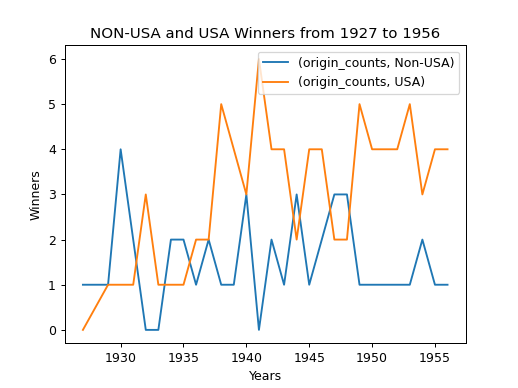

In [10]:
#Generate a Line Graph that includes the date of winners from 1927 to 1956 from USA and Non-USA
Oscars_df_pivot_edit.plot()

plt.title("NON-USA and USA Winners from 1927 to 1956")
plt.xlabel("Years")
plt.ylabel("Winners")


plt.legend()

#                  NON-USA AND USA WINNERS FROM 1957 TO 1976

In [11]:
#Create a data frame that includes Birthplace Origin and Year of award from 1957 to 1976 
Oscars_year_two =Oscars_df[(Oscars_df["year_of_award"]>=1957) & (Oscars_df["year_of_award"]<=1976)]
Oscars_year_two

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
130,670454382,"Oakland, Ca",USA,18-Dec-04,White,1.0000,Na,Straight,1.0,1957,1.0,Best Director,http://www.nndb.com/people/382/000044250/,Giant,George Stevens
131,670454468,"Vladivostok, Russia",Non-USA,11-Jul-20,White,1.0000,Na,Straight,1.0,1957,1.0,Best Actor,http://www.nndb.com/people/459/000026381/,The King and I,Yul Brynner
132,670454546,"Chihuahua, Mexico",Non-USA,21-Apr-15,Hispanic,1.0000,Na,Straight,1.0,1957,1.0,Best Supporting Actor,http://www.nndb.com/people/228/000032132/,Lust for Life,Anthony Quinn
133,670454632,"Stockholm, Sweden",Non-USA,29-Aug-15,White,1.0000,Na,Straight,1.0,1957,1.0,Best Actress,http://www.nndb.com/people/836/000024764/,Anastasia,Ingrid Bergman
134,670454711,"Chicago, Il",USA,30-Jan-25,White,1.0000,Na,Straight,1.0,1957,1.0,Best Supporting Actress,http://www.nndb.com/people/090/000063898/,Written on the Wind,Dorothy Malone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,670454487,New York City,USA,22-Apr-37,White,1.0000,Atheist,Straight,1.0,1976,1.0,Best Actor,http://www.nndb.com/people/722/000022656/,One Flew Over the Cuckoo's Nest,Jack Nicholson
235,670454565,New York City,USA,20-Jan-1896,White,1.0000,Jewish,Straight,1.0,1976,1.0,Best Supporting Actor,http://www.nndb.com/people/895/000022829/,The Sunshine Boys,George Burns
236,670454652,"Birmingham, Al",USA,22-Jul-34,White,1.0000,Na,Straight,1.0,1976,1.0,Best Actress,http://www.nndb.com/people/798/000063609/,One Flew Over the Cuckoo's Nest,Louise Fletcher
237,670454730,New York City,USA,31-Oct-27,White,0.9594,Jewish,Straight,1.0,1976,1.0,Best Supporting Actress,http://www.nndb.com/people/409/000032313/,Shampoo,Lee Grant


In [12]:
#Create a dataframe that shows Birthplace Origin and Year of award for USA winners from 1957 to 1976 
usa_df=Oscars_df[(Oscars_df["year_of_award"]>=1957) & (Oscars_df["year_of_award"]<=1976) &(Oscars_df["Birthplace_Origin"]== "USA")]
usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
130,670454382,"Oakland, Ca",USA,18-Dec-04,White,1.0,Na,Straight,1.0,1957,1.0,Best Director,http://www.nndb.com/people/382/000044250/,Giant,George Stevens
134,670454711,"Chicago, Il",USA,30-Jan-25,White,1.0,Na,Straight,1.0,1957,1.0,Best Supporting Actress,http://www.nndb.com/people/090/000063898/,Written on the Wind,Dorothy Malone
137,670454547,New York City,USA,5-Feb-19,White,1.0,Jewish,Straight,1.0,1958,1.0,Best Supporting Actor,http://www.nndb.com/people/820/000022754/,Sayonara,Red Buttons
138,670454633,"Thomasville, Ga",USA,27-Feb-30,White,1.0,Na,Straight,1.0,1958,1.0,Best Actress,http://www.nndb.com/people/747/000043618/,The Three Faces of Eve,Joanne Woodward
140,670944822,"Thomasville, Ga",USA,27-Feb-30,White,1.0,Na,Straight,1.0,1958,1.0,Best Actress,http://www.nndb.com/people/747/000043618/,The Three Faces of Eve,Joanne Woodward


In [13]:
#Create a dataframe that shows Birthplace Origin and Year of award for Non-USA winners from 1957 to 1976
non_usa_df=Oscars_df[(Oscars_df["year_of_award"]>=1957) & (Oscars_df["year_of_award"]<=1976) &(Oscars_df["Birthplace_Origin"]== "Non-USA")]
non_usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
131,670454468,"Vladivostok, Russia",Non-USA,11-Jul-20,White,1.0,Na,Straight,1.0000,1957,1.0,Best Actor,http://www.nndb.com/people/459/000026381/,The King and I,Yul Brynner
132,670454546,"Chihuahua, Mexico",Non-USA,21-Apr-15,Hispanic,1.0,Na,Straight,1.0000,1957,1.0,Best Supporting Actor,http://www.nndb.com/people/228/000032132/,Lust for Life,Anthony Quinn
133,670454632,"Stockholm, Sweden",Non-USA,29-Aug-15,White,1.0,Na,Straight,1.0000,1957,1.0,Best Actress,http://www.nndb.com/people/836/000024764/,Anastasia,Ingrid Bergman
135,670454383,"Croydon, Surrey, England",Non-USA,25-Mar-08,White,1.0,Na,Straight,0.6667,1958,1.0,Best Director,http://www.nndb.com/people/462/000032366/,The Bridge on the River Kwai,David Lean
136,670454469,"London, England",Non-USA,2-Apr-14,White,1.0,Roman Catholic,Bisexual,1.0000,1958,1.0,Best Actor,http://www.nndb.com/people/751/000023682/,The Bridge on the River Kwai,Alec Guinness


In [14]:
#Create a dataframe that includes origin counts for a line graph from 1957 to 1976
Oscars_df_pivot=Oscars_year_two.groupby(["year_of_award", "Birthplace_Origin"])["year_of_award"].agg("count").to_frame("origin_counts").reset_index()
Oscars_df_pivot

,year_of_award,Birthplace_Origin,origin_counts
0,1957,Non-USA,3
1,1957,USA,2
2,1958,Non-USA,3
3,1958,USA,3
4,1959,Non-USA,2
5,1959,USA,3
6,1960,Non-USA,3
7,1960,USA,2
8,1961,Non-USA,4
9,1961,USA,3


In [15]:
#Create a dataframe that Non-USA and USA are counted as numbers not letters from 1957 to 1976
Oscars_df_pivot_edit=Oscars_df_pivot.pivot(index = "year_of_award", columns = ["Birthplace_Origin"], values=["origin_counts"])
Oscars_df_pivot_edit

origin_counts     
Birthplace_Origin       Non-USA  USA
year_of_award                       
1957                        3.0  2.0
1958                        3.0  3.0
1959                        2.0  3.0
1960                        3.0  2.0
1961                        4.0  3.0
1962                        2.0  3.0
1963                        1.0  4.0
1964                        2.0  3.0
1965                        4.0  1.0
1966                        1.0  4.0
1967                        4.0  2.0
1968                        1.0  4.0
1969                        2.0  6.0
1970                        3.0  3.0
1971                        2.0  2.0
1972                        NaN  5.0
1973                        NaN  6.0
1974                        2.0  2.0
1975                        1.0  4.0
1976                        1.0  6.0

In [16]:
#Fill in the NAN data with 0 
Oscars_df_pivot_edit = Oscars_df_pivot_edit.fillna(0)
Oscars_df_pivot_edit

origin_counts     
Birthplace_Origin       Non-USA  USA
year_of_award                       
1957                        3.0  2.0
1958                        3.0  3.0
1959                        2.0  3.0
1960                        3.0  2.0
1961                        4.0  3.0
1962                        2.0  3.0
1963                        1.0  4.0
1964                        2.0  3.0
1965                        4.0  1.0
1966                        1.0  4.0
1967                        4.0  2.0
1968                        1.0  4.0
1969                        2.0  6.0
1970                        3.0  3.0
1971                        2.0  2.0
1972                        0.0  5.0
1973                        0.0  6.0
1974                        2.0  2.0
1975                        1.0  4.0
1976                        1.0  6.0

<IPython.core.display.Javascript object>


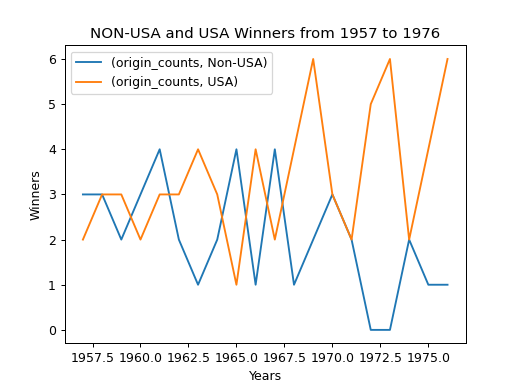

In [17]:
#Generate a Line Graph that includes the date of winners from 1957 to 1976 from USA and Non-USA
Oscars_df_pivot_edit.plot()

plt.title("NON-USA and USA Winners from 1957 to 1976")
plt.xlabel("Years")
plt.ylabel("Winners")


plt.legend()

# NON-USA AND USA WINNERS FROM 1977 TO 1996

In [18]:
#Create a data frame that includes Birthplace Origin and Year of award from 1957 to 1976 
Oscars_year_three =Oscars_df[(Oscars_df["year_of_award"]>=1977) & (Oscars_df["year_of_award"]<=1996)]
Oscars_year_three

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
239,670454488,"South Kensington, London, England",Non-USA,28-Sep-16,White,1.0,Na,Straight,1.0000,1977,1.0,Best Actor,http://www.nndb.com/people/745/000063556/,Network,Peter Finch
240,670454566,"Chicago, Il",USA,26-Jul-22,White,1.0,Na,Straight,1.0000,1977,1.0,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,All the President's Men,Jason Robards
241,670454653,"Bascom, Fl",USA,14-Jan-41,White,1.0,Roman Catholic,Straight,0.9599,1977,1.0,Best Actress,http://www.nndb.com/people/884/000022818/,Network,Faye Dunaway
242,670454731,"Old Westbury, Ny",USA,2-Aug-14,White,1.0,Na,Straight,1.0000,1977,1.0,Best Supporting Actress,http://www.nndb.com/people/817/000063628/,Network,Beatrice Straight
243,670944674,"Bascom, Fl",USA,14-Jan-41,White,1.0,Roman Catholic,Straight,1.0000,1977,1.0,Best Actress,http://www.nndb.com/people/884/000022818/,Network,Faye Dunaway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,670454422,"Peekskill, Ny",USA,3-Jan-56,White,1.0,Roman Catholic,Straight,1.0000,1996,1.0,Best Director,http://www.nndb.com/people/583/000022517/,Braveheart,Mel Gibson
338,670454507,"Long Beach, Ca",USA,7-Jan-64,White,1.0,Roman Catholic,Straight,1.0000,1996,1.0,Best Actor,http://www.nndb.com/people/751/000022685/,Leaving Las Vegas,Nicolas Cage
339,670454585,"South Orange, Nj",USA,26-Jul-59,White,1.0,Na,Matter of Dispute,1.0000,1996,1.0,Best Supporting Actor,http://www.nndb.com/people/591/000023522/,The Usual Suspects,Kevin Spacey
340,670454672,"Queens, Ny",USA,4-Oct-46,White,1.0,Roman Catholic,Straight,1.0000,1996,1.0,Best Actress,http://www.nndb.com/people/762/000024690/,Dead Man Walking,Susan Sarandon


In [19]:
#Create a dataframe that shows Birthplace Origin and Year of award for USA winners from 1957 to 1976 
usa_df=Oscars_df[(Oscars_df["year_of_award"]>=1977) & (Oscars_df["year_of_award"]<=1996) &(Oscars_df["Birthplace_Origin"]== "USA")]
usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
240,670454566,"Chicago, Il",USA,26-Jul-22,White,1.0,Na,Straight,1.0000,1977,1.0,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,All the President's Men,Jason Robards
241,670454653,"Bascom, Fl",USA,14-Jan-41,White,1.0,Roman Catholic,Straight,0.9599,1977,1.0,Best Actress,http://www.nndb.com/people/884/000022818/,Network,Faye Dunaway
242,670454731,"Old Westbury, Ny",USA,2-Aug-14,White,1.0,Na,Straight,1.0000,1977,1.0,Best Supporting Actress,http://www.nndb.com/people/817/000063628/,Network,Beatrice Straight
243,670944674,"Bascom, Fl",USA,14-Jan-41,White,1.0,Roman Catholic,Straight,1.0000,1977,1.0,Best Actress,http://www.nndb.com/people/884/000022818/,Network,Faye Dunaway
244,670964912,"Chicago, Il",USA,26-Jul-22,White,1.0,Na,Straight,1.0000,1977,1.0,Best Supporting Actor,http://www.nndb.com/people/224/000032128/,All the President's Men,Jason Robards


In [20]:
#Create a dataframe that shows Birthplace Origin and Year of award for Non-USA winners from 1957 to 1976 
non_usa_df=Oscars_df[(Oscars_df["year_of_award"]>=1977) & (Oscars_df["year_of_award"]<=1996) &(Oscars_df["Birthplace_Origin"]== "Non-USA")]
non_usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
239,670454488,"South Kensington, London, England",Non-USA,28-Sep-16,White,1.0,Na,Straight,1.0,1977,1.0,Best Actor,http://www.nndb.com/people/745/000063556/,Network,Peter Finch
249,670454732,"London, England",Non-USA,30-Jan-37,White,1.0,Na,Straight,1.0,1978,1.0,Best Supporting Actress,http://www.nndb.com/people/590/000023521/,Julia,Vanessa Redgrave
254,670454733,"Ilford, Essex, England",Non-USA,28-Dec-34,White,1.0,Na,Straight,1.0,1979,1.0,Best Supporting Actress,http://www.nndb.com/people/260/000030170/,California Suite,Maggie Smith
267,670454409,"Cambridge, England",Non-USA,29-Aug-23,White,1.0,Na,Straight,1.0,1982,1.0,Best Director,http://www.nndb.com/people/750/000023681/,Gandhi,Richard Attenborough
269,670454571,"London, England",Non-USA,14-Apr-04,White,1.0,Na,Gay,1.0,1982,1.0,Best Supporting Actor,http://www.nndb.com/people/589/000033490/,Arthur,John Gielgud


In [21]:
#Create a dataframe that includes origin counts for a line graph from 1977 to 1996
Oscars_df_pivot=Oscars_year_three.groupby(["year_of_award", "Birthplace_Origin"])["year_of_award"].agg("count").to_frame("origin_counts").reset_index()
Oscars_df_pivot

,year_of_award,Birthplace_Origin,origin_counts
0,1977,Non-USA,1
1,1977,USA,5
2,1978,Non-USA,1
3,1978,USA,4
4,1979,Non-USA,1
5,1979,USA,5
6,1980,USA,6
7,1981,USA,5
8,1982,Non-USA,2
9,1982,USA,3


In [22]:
#Create a dataframe that Non-USA and USA are counted as numbers not letters from 1977 to 1996
Oscars_df_pivot_edit=Oscars_df_pivot.pivot(index = "year_of_award", columns = ["Birthplace_Origin"], values=["origin_counts"])
Oscars_df_pivot_edit

origin_counts     
Birthplace_Origin       Non-USA  USA
year_of_award                       
1977                        1.0  5.0
1978                        1.0  4.0
1979                        1.0  5.0
1980                        NaN  6.0
1981                        NaN  5.0
1982                        2.0  3.0
1983                        1.0  4.0
1984                        NaN  4.0
1985                        3.0  2.0
1986                        NaN  5.0
1987                        1.0  3.0
1988                        2.0  3.0
1989                        NaN  5.0
1990                        2.0  4.0
1991                        1.0  4.0
1992                        1.0  4.0
1993                        1.0  4.0
1994                        1.0  5.0
1995                        NaN  5.0
1996                        NaN  5.0

In [23]:
#Fill in the NAN data with 0 
Oscars_df_pivot_edit = Oscars_df_pivot_edit.fillna(0)
Oscars_df_pivot_edit.dtypes

               Birthplace_Origin
origin_counts  Non-USA              float64
               USA                  float64
dtype: object

<IPython.core.display.Javascript object>


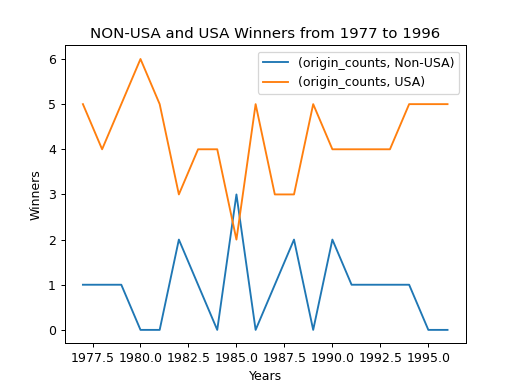

In [24]:
#Generate a Line Graph that includes the date of winners from 1977 to 1996 from USA and Non-USA
Oscars_df_pivot_edit.plot()

plt.title("NON-USA and USA Winners from 1977 to 1996")
plt.xlabel("Years")
plt.ylabel("Winners")


plt.legend()

# NON-USA AND USA WINNERS FROM 1997 TO 2006

In [25]:
#Create a data frame that includes Birthplace Origin and Year of award from 1996 to 2006 
Oscars_year_four =Oscars_df[(Oscars_df["year_of_award"]>=1997) & (Oscars_df["year_of_award"]<=2006)]
Oscars_year_four

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
342,670454423,"Ryde, Isle of Wight, England",Non-USA,6-Jan-54,White,1.0,Na,Straight,1.0000,1997,1.0000,Best Director,http://www.nndb.com/people/513/000032417/,The English Patient,Anthony Minghella
343,670454508,"Toowoomba, Queensland, Australia",Non-USA,6-Jul-51,White,1.0,Na,Straight,1.0000,1997,1.0000,Best Actor,http://www.nndb.com/people/126/000025051/,Shine,Geoffrey Rush
344,670454509,New York City,USA,22-Apr-37,White,1.0,Atheist,Straight,1.0000,1997,1.0000,Best Actor,http://www.nndb.com/people/722/000022656/,As Good as It Gets,Jack Nicholson
345,670454586,"Bronx, Ny",USA,2-Jan-68,Black,1.0,Na,Straight,1.0000,1997,1.0000,Best Supporting Actor,http://www.nndb.com/people/587/000023518/,Jerry Maguire,"Cuba Gooding, Jr."
346,670454673,"Chicago, Il",USA,23-Jun-57,White,1.0,Disciples of Christ,Straight,1.0000,1997,1.0000,Best Actress,http://www.nndb.com/people/517/000025442/,Fargo,Frances McDormand
347,670454751,"Paris, France",Non-USA,9-Mar-64,White,1.0,Na,Straight,1.0000,1997,1.0000,Best Supporting Actress,http://www.nndb.com/people/970/000025895/,The English Patient,Juliette Binoche
348,670454424,"Kapuskasing, Ontario, Canada",Non-USA,16-Aug-54,White,1.0,Atheist,Straight,1.0000,1998,1.0000,Best Director,http://www.nndb.com/people/385/000025310/,Titanic,James Cameron
349,670454587,"Chicago, Il",USA,21-Jul-51,White,1.0,Anglican/episcopalian,Straight,1.0000,1998,1.0000,Best Supporting Actor,http://www.nndb.com/people/606/000022540/,Good Will Hunting,Robin Williams
350,670454674,"Culver City, Ca",USA,15-Jun-63,White,1.0,Na,Straight,1.0000,1998,1.0000,Best Actress,http://www.nndb.com/people/554/000023485/,As Good As It Gets,Helen Hunt
351,670454752,"Athens, Ga",Non-USA,8-Dec-53,White,1.0,Na,Straight,1.0000,1998,1.0000,Best Supporting Actress,http://www.nndb.com/people/310/000025235/,L.A. Confidential,Kim Basinger


In [26]:
#Create a dataframe that shows Birthplace Origin and Year of award for USA winners from 1997 to 2006 
usa_df=Oscars_df[(Oscars_df["year_of_award"]>=1997) & (Oscars_df["year_of_award"]<=2006) &(Oscars_df["Birthplace_Origin"]== "USA")]
usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
344,670454509,New York City,USA,22-Apr-37,White,1.0,Atheist,Straight,1.0,1997,1.0,Best Actor,http://www.nndb.com/people/722/000022656/,As Good as It Gets,Jack Nicholson
345,670454586,"Bronx, Ny",USA,2-Jan-68,Black,1.0,Na,Straight,1.0,1997,1.0,Best Supporting Actor,http://www.nndb.com/people/587/000023518/,Jerry Maguire,"Cuba Gooding, Jr."
346,670454673,"Chicago, Il",USA,23-Jun-57,White,1.0,Disciples of Christ,Straight,1.0,1997,1.0,Best Actress,http://www.nndb.com/people/517/000025442/,Fargo,Frances McDormand
349,670454587,"Chicago, Il",USA,21-Jul-51,White,1.0,Anglican/episcopalian,Straight,1.0,1998,1.0,Best Supporting Actor,http://www.nndb.com/people/606/000022540/,Good Will Hunting,Robin Williams
350,670454674,"Culver City, Ca",USA,15-Jun-63,White,1.0,Na,Straight,1.0,1998,1.0,Best Actress,http://www.nndb.com/people/554/000023485/,As Good As It Gets,Helen Hunt


In [27]:
#Create a dataframe that shows Birthplace Origin and Year of award for Non-USA winners from 1997 to 2006 
non_usa_df=Oscars_df[(Oscars_df["year_of_award"]>=1997) & (Oscars_df["year_of_award"]<=2006) &(Oscars_df["Birthplace_Origin"]== "Non-USA")]
non_usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
342,670454423,"Ryde, Isle of Wight, England",Non-USA,6-Jan-54,White,1.0,Na,Straight,1.0,1997,1.0,Best Director,http://www.nndb.com/people/513/000032417/,The English Patient,Anthony Minghella
343,670454508,"Toowoomba, Queensland, Australia",Non-USA,6-Jul-51,White,1.0,Na,Straight,1.0,1997,1.0,Best Actor,http://www.nndb.com/people/126/000025051/,Shine,Geoffrey Rush
347,670454751,"Paris, France",Non-USA,9-Mar-64,White,1.0,Na,Straight,1.0,1997,1.0,Best Supporting Actress,http://www.nndb.com/people/970/000025895/,The English Patient,Juliette Binoche
348,670454424,"Kapuskasing, Ontario, Canada",Non-USA,16-Aug-54,White,1.0,Atheist,Straight,1.0,1998,1.0,Best Director,http://www.nndb.com/people/385/000025310/,Titanic,James Cameron
351,670454752,"Athens, Ga",Non-USA,8-Dec-53,White,1.0,Na,Straight,1.0,1998,1.0,Best Supporting Actress,http://www.nndb.com/people/310/000025235/,L.A. Confidential,Kim Basinger


In [28]:
#Create a dataframe that includes origin counts for a line graph from 1997 to 2006
Oscars_df_pivot=Oscars_year_four.groupby(["year_of_award", "Birthplace_Origin"])["year_of_award"].agg("count").to_frame("origin_counts").reset_index()
Oscars_df_pivot

,year_of_award,Birthplace_Origin,origin_counts
0,1997,Non-USA,3
1,1997,USA,3
2,1998,Non-USA,2
3,1998,USA,2
4,1999,Non-USA,2
5,1999,USA,5
6,2000,Non-USA,2
7,2000,USA,4
8,2001,Non-USA,1
9,2001,USA,5


In [29]:
#Create a dataframe that Non-USA and USA are counted as numbers not letters from 1997 to 2006
Oscars_df_pivot_edit=Oscars_df_pivot.pivot(index = "year_of_award", columns = ["Birthplace_Origin"], values=["origin_counts"])
Oscars_df_pivot_edit

origin_counts    
Birthplace_Origin       Non-USA USA
year_of_award                      
1997                          3   3
1998                          2   2
1999                          2   5
2000                          2   4
2001                          1   5
2002                          1   4
2003                          2   4
2004                          2   2
2005                          1   6
2006                          3   3

In [30]:
#Fill in the NAN data with 0 
Oscars_df_pivot_edit = Oscars_df_pivot_edit.fillna(0)
Oscars_df_pivot_edit

origin_counts    
Birthplace_Origin       Non-USA USA
year_of_award                      
1997                          3   3
1998                          2   2
1999                          2   5
2000                          2   4
2001                          1   5
2002                          1   4
2003                          2   4
2004                          2   2
2005                          1   6
2006                          3   3

<IPython.core.display.Javascript object>


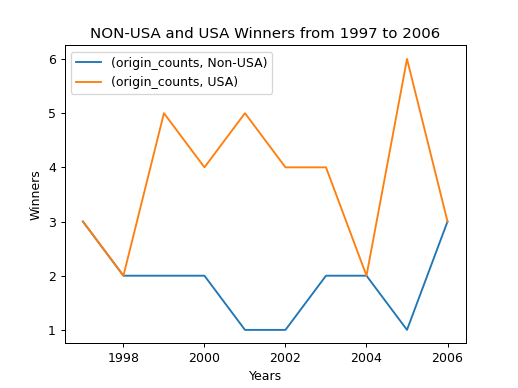

In [31]:
#Generate a Line Graph that includes the date of winners from 1997 to 2006 from USA and Non-USA
Oscars_df_pivot_edit.plot()

plt.title("NON-USA and USA Winners from 1997 to 2006")
plt.xlabel("Years")
plt.ylabel("Winners")


plt.legend()

# NON-USA AND USA WINNERS FROM 2007 TO 2014

In [32]:
#Create a data frame that includes Birthplace Origin and Year of award from 2007 to 2014 
Oscars_year_five =Oscars_df[(Oscars_df["year_of_award"]>=2007) & (Oscars_df["year_of_award"]<=2014)]
Oscars_year_five

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
399,670454433,"Flushing, Ny",USA,17-Nov-42,White,1.0000,Roman Catholic,Straight,1.0000,2007,1.0000,Best Director,http://www.nndb.com/people/678/000022612/,The Departed,Martin Scorsese
400,670454518,"Longview, Tx",USA,15-Jul-61,Black,1.0000,Na,Straight,1.0000,2007,1.0000,Best Actor,http://www.nndb.com/people/833/000025758/,The Last King of Scotland,Forest Whitaker
401,670454596,"Brooklyn, Ny",USA,26-Mar-34,White,1.0000,Jewish,Straight,1.0000,2007,1.0000,Best Supporting Actor,http://www.nndb.com/people/777/000022711/,Little Miss Sunshine,Alan Arkin
402,670454683,"Chiswick, London, England",Non-USA,26-Jul-45,White,1.0000,Na,Straight,1.0000,2007,1.0000,Best Actress,http://www.nndb.com/people/907/000044775/,The Queen,Helen Mirren
403,670454761,"Chicago, Il",USA,12-Sep-81,Black,1.0000,Baptist,Straight,1.0000,2007,1.0000,Best Supporting Actress,http://www.nndb.com/people/434/000129047/,Dreamgirls,Jennifer Hudson
404,670454762,"London, England",Non-USA,5-Nov-60,White,1.0000,Na,Straight,1.0000,2007,1.0000,Best Supporting Actress,http://www.nndb.com/people/178/000108851/,Michael Clayton,Tilda Swinton
405,670454394,"St. Louis Park, Mn",USA,29-Nov-54,White,1.0000,Jewish,Straight,1.0000,2008,1.0000,Best Director,http://www.nndb.com/people/399/000025324/,No Country for Old Men,Joel Coen
406,670454434,"St. Louis Park, Mn",USA,21-Sep-57,White,1.0000,Jewish,Straight,1.0000,2008,1.0000,Best Director,http://www.nndb.com/people/400/000025325/,No Country for Old Men,Ethan Coen
407,670454519,"London, England",Non-USA,29-Apr-57,White,1.0000,Na,Straight,1.0000,2008,1.0000,Best Actor,http://www.nndb.com/people/788/000022722/,There Will Be Blood,Daniel Day-Lewis
408,670454597,"Las Palmas De Gran Canaria, Canary Islands",Non-USA,1-Mar-69,Hispanic,1.0000,Na,Straight,1.0000,2008,1.0000,Best Supporting Actor,http://www.nndb.com/people/733/000109406/,No Country for Old Men,Javier Bardem


In [33]:
#Create a dataframe that shows Birthplace Origin and Year of award for USA winners from 2007 to 2014 
usa_df=Oscars_df[(Oscars_df["year_of_award"]>=2007) & (Oscars_df["year_of_award"]<=2014) &(Oscars_df["Birthplace_Origin"]== "USA")]
usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
399,670454433,"Flushing, Ny",USA,17-Nov-42,White,1.0,Roman Catholic,Straight,1.0,2007,1.0,Best Director,http://www.nndb.com/people/678/000022612/,The Departed,Martin Scorsese
400,670454518,"Longview, Tx",USA,15-Jul-61,Black,1.0,Na,Straight,1.0,2007,1.0,Best Actor,http://www.nndb.com/people/833/000025758/,The Last King of Scotland,Forest Whitaker
401,670454596,"Brooklyn, Ny",USA,26-Mar-34,White,1.0,Jewish,Straight,1.0,2007,1.0,Best Supporting Actor,http://www.nndb.com/people/777/000022711/,Little Miss Sunshine,Alan Arkin
403,670454761,"Chicago, Il",USA,12-Sep-81,Black,1.0,Baptist,Straight,1.0,2007,1.0,Best Supporting Actress,http://www.nndb.com/people/434/000129047/,Dreamgirls,Jennifer Hudson
405,670454394,"St. Louis Park, Mn",USA,29-Nov-54,White,1.0,Jewish,Straight,1.0,2008,1.0,Best Director,http://www.nndb.com/people/399/000025324/,No Country for Old Men,Joel Coen


In [34]:
#Create a dataframe that shows Birthplace Origin and Year of award for Non-USA winners from 2007 to 2014 
non_usa_df=Oscars_df[(Oscars_df["year_of_award"]>=2007) & (Oscars_df["year_of_award"]<=2014) &(Oscars_df["Birthplace_Origin"]== "Non-USA")]
non_usa_df.head()

,_unit_id,birthplace,Birthplace_Origin,date_of_birth,race_ethnicity,race_ethnicity:confidence,religion,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person
402,670454683,"Chiswick, London, England",Non-USA,26-Jul-45,White,1.0,Na,Straight,1.0,2007,1.0,Best Actress,http://www.nndb.com/people/907/000044775/,The Queen,Helen Mirren
404,670454762,"London, England",Non-USA,5-Nov-60,White,1.0,Na,Straight,1.0,2007,1.0,Best Supporting Actress,http://www.nndb.com/people/178/000108851/,Michael Clayton,Tilda Swinton
407,670454519,"London, England",Non-USA,29-Apr-57,White,1.0,Na,Straight,1.0,2008,1.0,Best Actor,http://www.nndb.com/people/788/000022722/,There Will Be Blood,Daniel Day-Lewis
408,670454597,"Las Palmas De Gran Canaria, Canary Islands",Non-USA,1-Mar-69,Hispanic,1.0,Na,Straight,1.0,2008,1.0,Best Supporting Actor,http://www.nndb.com/people/733/000109406/,No Country for Old Men,Javier Bardem
409,670454684,"Paris, France",Non-USA,30-Sep-75,White,1.0,Na,Straight,1.0,2008,1.0,Best Actress,http://www.nndb.com/people/723/000136315/,The Passionate Life of Edith Piaf,Marion Cotillard


In [35]:
#Create a dataframe that includes origin counts for a line graph from 2007 to 2014
Oscars_df_pivot=Oscars_year_five.groupby(["year_of_award", "Birthplace_Origin"])["year_of_award"].agg("count").to_frame("origin_counts").reset_index()
Oscars_df_pivot

,year_of_award,Birthplace_Origin,origin_counts
0,2007,Non-USA,2
1,2007,USA,4
2,2008,Non-USA,3
3,2008,USA,2
4,2009,Non-USA,5
5,2009,USA,2
6,2010,NONE,1
7,2010,USA,4
8,2011,Non-USA,4
9,2011,USA,1


In [36]:
#Create a dataframe that Non-USA and USA are counted as numbers not letters from 2007 to 2014
Oscars_df_pivot_edit=Oscars_df_pivot.pivot(index = "year_of_award", columns = ["Birthplace_Origin"], values=["origin_counts"])
Oscars_df_pivot_edit

origin_counts             
Birthplace_Origin          NONE Non-USA  USA
year_of_award                               
2007                        NaN     2.0  4.0
2008                        NaN     3.0  2.0
2009                        NaN     5.0  2.0
2010                        1.0     NaN  4.0
2011                        NaN     4.0  1.0
2012                        NaN     3.0  2.0
2013                        1.0     2.0  2.0
2014                        NaN     1.0  3.0

In [37]:
#Fill in the NAN data with 0 
Oscars_df_pivot_edit = Oscars_df_pivot_edit.fillna(0)
Oscars_df_pivot_edit

origin_counts             
Birthplace_Origin          NONE Non-USA  USA
year_of_award                               
2007                        0.0     2.0  4.0
2008                        0.0     3.0  2.0
2009                        0.0     5.0  2.0
2010                        1.0     0.0  4.0
2011                        0.0     4.0  1.0
2012                        0.0     3.0  2.0
2013                        1.0     2.0  2.0
2014                        0.0     1.0  3.0

<IPython.core.display.Javascript object>


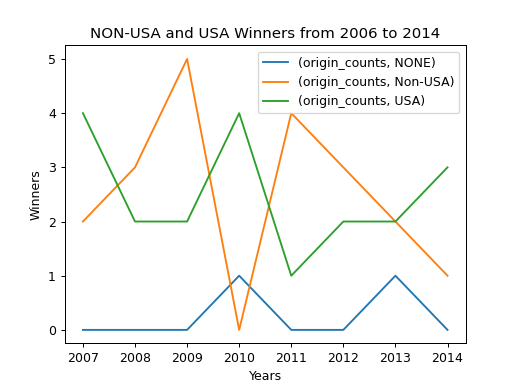

In [38]:
#Generate a Line Graph that includes the date of winners from 2006 to 2014 from USA and Non-USA
Oscars_df_pivot_edit.plot()

plt.title("NON-USA and USA Winners from 2006 to 2014")
plt.xlabel("Years")
plt.ylabel("Winners")


plt.legend()